In [1]:
# data set taken from Kaggle
# Available at https://www.kaggle.com/datasets/socathie/kickstarter-project-statistics

In [2]:
# import required libraries for dataframe and visualization
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import feature_selection, linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read data from csv file
kickstart_data = pd.read_csv("most_backed.csv")
# delete unused/unnecessary column
del kickstart_data ['Unnamed: 0']

In [4]:
# rename some columns (this is to avoid errors with juptyer notebook syntax the dot operator in the columns names will function incorrectly)
kickstart_data.rename(columns = {'amt.pledged' : 'pledged_amount'}, inplace=True)
kickstart_data.rename(columns = {'pledge.tier' : 'pledge_tier'}, inplace=True)
kickstart_data.rename(columns = {'num.backers' : 'backers'}, inplace=True)
kickstart_data.rename(columns = {'num.backers.tier' : 'backers_by_tier'}, inplace=True)
kickstart_data.rename(columns = {'blurb' : 'pitch'}, inplace=True)

In [5]:
# return the first 5 rows of the dataframe
kickstart_data.head()

,pledged_amount,pitch,by,category,currency,goal,location,backers,backers_by_tier,pledge_tier,title,url
0,8782571.0,\nThis is a card game for people who are into ...,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
1,6465690.0,"\nAn unusually addicting, high-quality desk to...",Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy
2,5408916.0,\nBring Reading Rainbow’s library of interacti...,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...
3,5702153.0,\nUPDATED: This is it. We're making a Veronica...,Rob Thomas,Narrative Film,usd,2000000.0,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, ...","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-pr...
4,3336371.0,"\nAn adventure game from Tim Schafer, Double F...",Double Fine and 2 Player Productions,Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...",Double Fine Adventure,/projects/doublefine/double-fine-adventure


In [6]:
# print a concise summary of the dataframe
kickstart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pledged_amount   4000 non-null   float64
 1   pitch            4000 non-null   object 
 2   by               4000 non-null   object 
 3   category         4000 non-null   object 
 4   currency         4000 non-null   object 
 5   goal             4000 non-null   float64
 6   location         4000 non-null   object 
 7   backers          4000 non-null   int64  
 8   backers_by_tier  4000 non-null   object 
 9   pledge_tier      4000 non-null   object 
 10  title            4000 non-null   object 
 11  url              4000 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 375.1+ KB


In [7]:
# view descriptive statistics of the data
kickstart_data.describe()

,pledged_amount,goal,backers
count,4.000000e+03,4.000000e+03,4000.000000
mean,2.899923e+05,6.175203e+04,3582.875750
std,7.119369e+05,1.266715e+05,7316.102809
min,1.925000e+03,1.000000e+00,1109.000000
25%,6.771300e+04,1.300000e+04,1406.750000
50%,1.205860e+05,3.000000e+04,1946.000000
75%,2.593680e+05,6.000000e+04,3372.000000
max,2.033899e+07,2.000000e+06,219382.000000


In [8]:
# check for missing values by column
kickstart_data.isnull().sum()

pledged_amount     0
pitch              0
by                 0
category           0
currency           0
goal               0
location           0
backers            0
backers_by_tier    0
pledge_tier        0
title              0
url                0
dtype: int64

In [9]:
# return the number of rows and columns in the dataframe
kickstart_data.shape

(4000, 12)

In [10]:
# view the correlation between the data
kickstart_data.corr()

,pledged_amount,goal,backers
pledged_amount,1.000000,0.436182,0.717896
goal,0.436182,1.000000,0.444587
backers,0.717896,0.444587,1.000000


<AxesSubplot:>

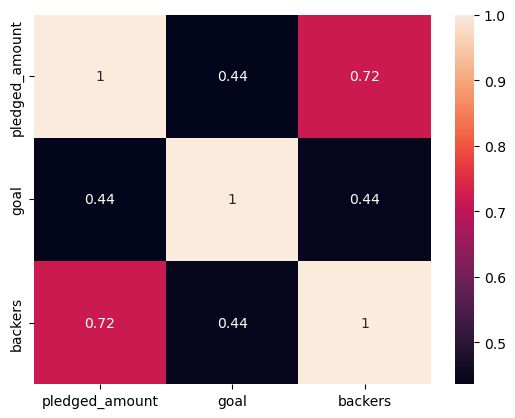

In [11]:
# vizualing the correlation between the data via a heatmap
sns.heatmap(kickstart_data.corr(), annot=True)

# we can see that pledge amount and backers are above 0.5 and are highly correlated

In [12]:
# view data by category value
kickstart_data.category.value_counts(ascending = False)[0:10]

Product Design    773
Tabletop Games    742
Video Games       524
Hardware          182
Technology        152
Documentary       124
Gadgets           121
Design             99
Comics             79
Wearables          64
Name: category, dtype: int64

<AxesSubplot:xlabel='pledged_amount', ylabel='backers'>

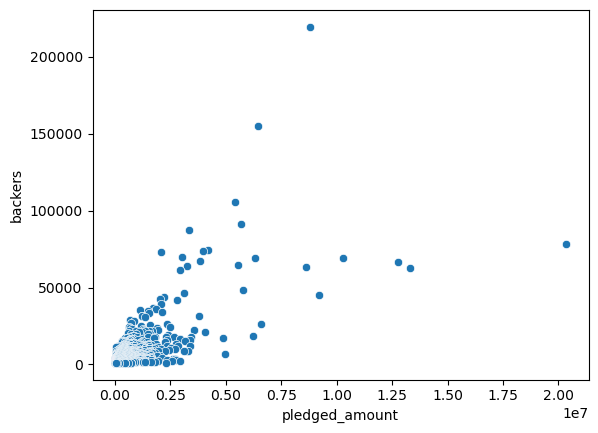

In [13]:
# generate a scatterplot to compare pledged amount with backers
sns.scatterplot(data=kickstart_data, x='pledged_amount', y="backers")

In [14]:
# keep only the columns we need for linear regression.
kickstart_train = kickstart_data.drop(['pitch','by','currency','location','backers_by_tier','pledge_tier', 'url'], axis=1)

In [15]:
# reindex only the needed columns
train_cols = ['title', 'category', 'backers', 'goal', 'pledged_amount']
kickstart_train = kickstart_train.reindex(columns= train_cols)

In [16]:
# create a new variable called percent funded which is the pledged amount divided by goal
kickstart_train['percent_funded'] =(kickstart_train.pledged_amount / kickstart_train.goal)

# round decimals
for value in kickstart_train.percent_funded:
    np.around(value, decimals=1)

# display the first 5 rows with new column
kickstart_train.head()

,title,category,backers,goal,pledged_amount,percent_funded
0,Exploding Kittens,Tabletop Games,219382,10000.0,8782571.0,878.257100
1,Fidget Cube: A Vinyl Desk Toy,Product Design,154926,15000.0,6465690.0,431.046000
2,"Bring Reading Rainbow Back for Every Child, Ev...",Web,105857,1000000.0,5408916.0,5.408916
3,The Veronica Mars Movie Project,Narrative Film,91585,2000000.0,5702153.0,2.851077
4,Double Fine Adventure,Video Games,87142,400000.0,3336371.0,8.340927


In [17]:
# view correlation 
kickstart_train.corr()

,backers,goal,pledged_amount,percent_funded
backers,1.000000,0.444587,0.717896,0.004182
goal,0.444587,1.000000,0.436182,-0.015837
pledged_amount,0.717896,0.436182,1.000000,-0.003536
percent_funded,0.004182,-0.015837,-0.003536,1.000000


<AxesSubplot:>

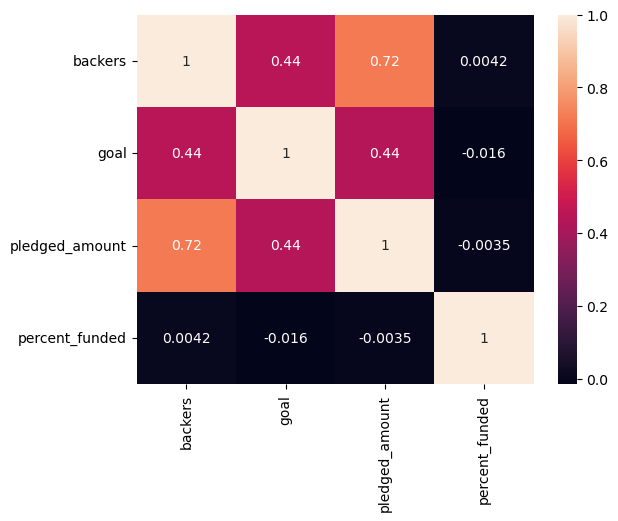

In [18]:
# vizualing the correlation between the data via a heatmap
sns.heatmap(kickstart_train.corr(), annot=True)

# we still see that pledge amount and backers are highly correlated and percent funded doesn't have a huge impact on the values

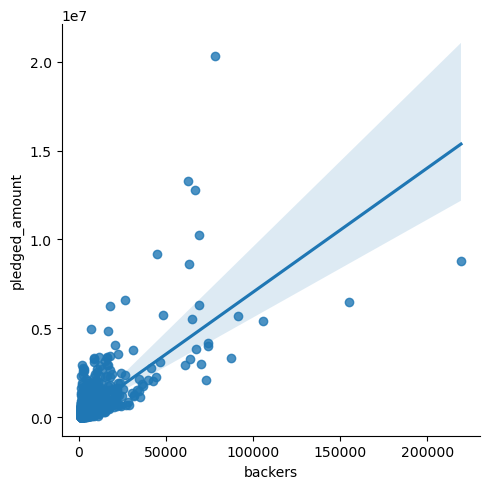

In [19]:
# create a scatterplot to visualize the correlation between pledged amount and backers
sns.lmplot('backers', 'pledged_amount', kickstart_train)

In [20]:
log_columns = ['backers','pledged_amount','percent_funded']
# create a copy of kickstart_train
log_kickstart = kickstart_train.copy()
# replace original columns from copied dataframe with logged values
log_kickstart[log_columns] = log_kickstart[log_columns].apply(np.log10)

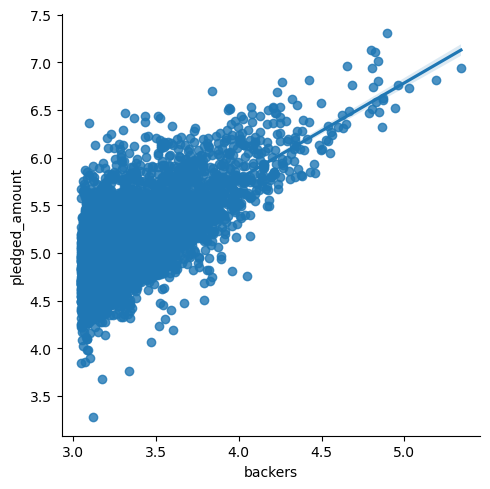

In [21]:
# view logged values on scatterplot for backers and pledged amount
sns.lmplot('backers', 'pledged_amount', log_kickstart)

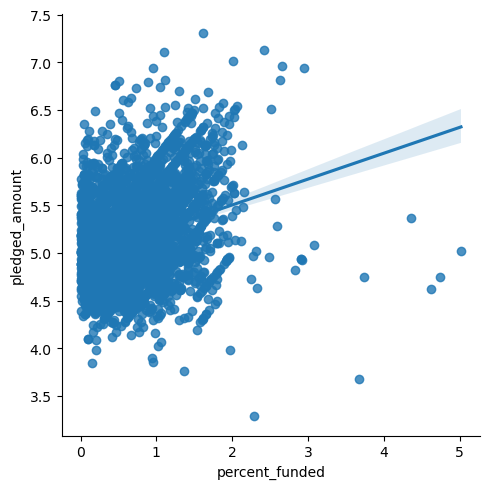

In [22]:
# view logged values on scatterplot for percent funded and pledged amount
sns.lmplot('percent_funded', 'pledged_amount', log_kickstart)

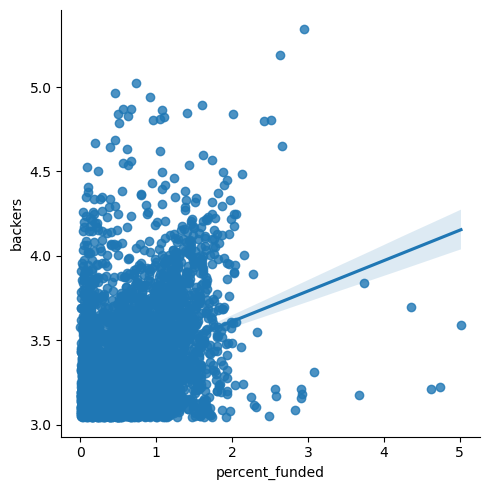

In [23]:
# view logged values on scatterplot for percent funded and backers
sns.lmplot('percent_funded', 'backers', log_kickstart)

<AxesSubplot:xlabel='backers', ylabel='pledged_amount'>

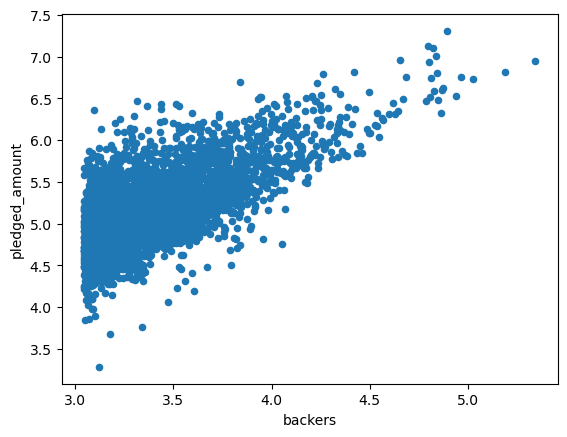

In [24]:
# viewing the logged data as scatterplot
log_kickstart.plot(kind='scatter', x='backers', y='pledged_amount')

<AxesSubplot:xlabel='percent_funded', ylabel='pledged_amount'>

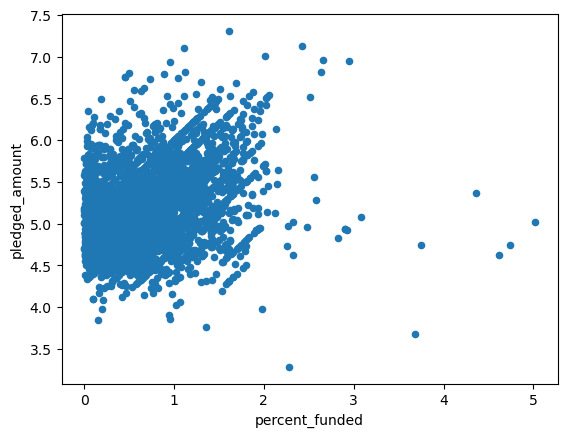

In [25]:
# viewing the logged data as scatterplot
log_kickstart.plot(kind='scatter', x='percent_funded', y='pledged_amount')

<AxesSubplot:xlabel='percent_funded', ylabel='backers'>

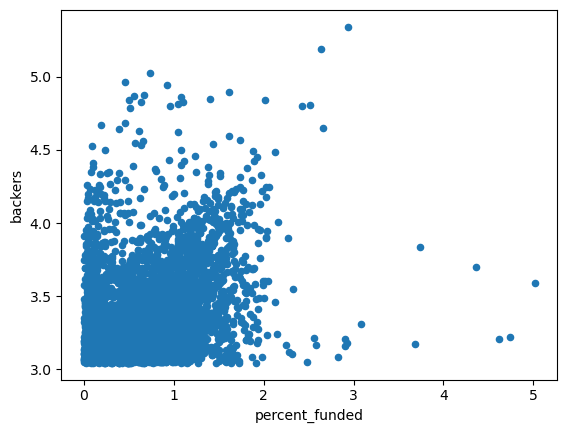

In [26]:
# viewing the logged data as scatterplot
log_kickstart.plot(kind='scatter', x='percent_funded', y='backers')

In [27]:
# define a function called plot_category which will take category as input
# we create a new variable called kickstart test which will be a subset of kickstart train filtered only towards the category
# we do so by using the .loc method to filter kickstart_train
# then we call the .plot method on the filtered dataframe and pass the type of plot we want to create
# we then create two new variables x and y which are subsets of kickstart_test
# x will only contain the backers column
# y will only contain the pledged_amount column
def plot_category(category):
    kickstart_test = kickstart_train.loc[kickstart_data['category'] == category]
    kickstart_test.plot(kind='scatter', x='backers', y='pledged_amount')
    X = kickstart_test[["backers"]]
    Y = kickstart_test["pledged_amount"]

In [28]:
# a function to fit a regression on each category
# we use ols regression to modle the relationship between the continuous variable and independant variable
# we want to create a simple linear regression between the independent variable 'backers' and dependent variable 'pledged_amount'
# to do this we first grouped the dataset by categories and then created a for loop to iterate over the categories
# in each iteration we only looked for rows that belong to the current category
# then we define the two variables
# then we create a model for the ols regression and fit the model
# and finally we print a summary of the model

def ols_reg(category):
    kickstart_test = kickstart_train.loc[kickstart_data['category'] == category]
    X = kickstart_test[["backers"]]
    Y = kickstart_test["pledged_amount"]
    model = sm.OLS(Y, X)
    results = model.fit()
    print(results.summary())
kickstart_train.category.unique()

array(['Tabletop Games', 'Product Design', 'Web', 'Narrative Film',
       'Video Games', 'Technology', 'Gaming Hardware', 'Television',
       'Hardware', 'Music', 'Space Exploration', 'Radio &amp; Podcasts',
       'Flight', 'Sound', 'Animation', 'Games', 'Action', 'Gadgets',
       'Documentary', '3D Printing', 'DIY Electronics', 'Publishing',
       'Fashion', 'Comics', 'Typography', "Children's Books", 'Apparel',
       'Food', 'Crafts', 'Camera Equipment', 'Comedy', 'Design',
       'Graphic Design', 'Apps', 'Hip-Hop', 'World Music',
       'Film &amp; Video', 'Drinks', 'Wearables', 'Accessories',
       'Footwear', 'Science Fiction', 'Art Books', 'Nonfiction', 'Robots',
       'Art', 'Software', 'Chiptune', 'Webseries', 'Webcomics', 'Rock',
       'Playing Cards', 'Cookbooks', 'Fantasy', 'Photography',
       'Anthologies', 'Faith', 'Mixed Media', 'Metal', 'Small Batch',
       'Classical Music', 'Architecture', 'Pop', 'Dance',
       'Electronic Music', 'Graphic Novels', 'Music

                                 OLS Regression Results                                
Dep. Variable:         pledged_amount   R-squared (uncentered):                   0.861
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                              3253.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                   1.18e-226
Time:                        02:10:33   Log-Likelihood:                         -7258.5
No. Observations:                 524   AIC:                                  1.452e+04
Df Residuals:                     523   BIC:                                  1.452e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

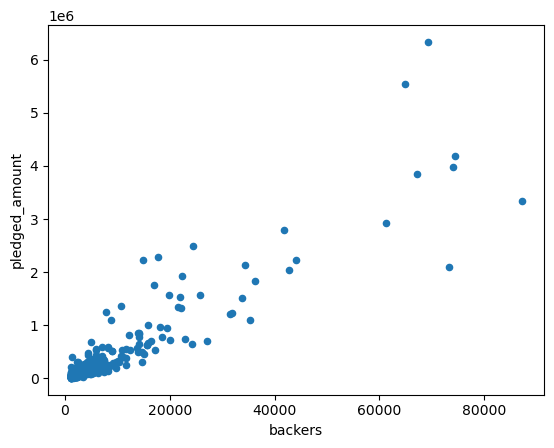

In [29]:
# here we call the ols_reg() function to do the regression analysis for the category of video games
# we then call the plot_category() function to print out the analysis for this category
# in theory we could do this same analysis for each category and see the accurracy score denoted by R^2 
c = 'Video Games'
ols_reg(c)
plot_category(c)

# this is not the model test but just to show that we could go through each category and 
# see the relationship between our variables and the categories and in this case we're looking exclusively at video games 

In [30]:
# here we create two variables x and y 
# x will only contain the logged backers column
# y will only contain the logged pledged_amount column
X = log_kickstart[["backers"]]
y = log_kickstart["pledged_amount"]


# we use the train_test_split function from sklearn to split the data
# we set the test_size parameter to 0.5 which means the data will be split 50/50 into training and test sets respectively
# we also set the random_state parameter to 0 which means evertyime we run the code we will get the same random split of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


# here we create a linear regression model object
# and train the model using the fit() method using the training dataset
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)

# we then print the intercept and coefficients of the model
print ("The intercept is " + str(results.intercept_))
print ("The coefficient is " + str(results.coef_))

The intercept is 1.7896130638841128
The coefficient is [0.99363581]


In [31]:
# we use the libary of statsmodels as sm
# with that we fit the model with the training set
model = sm.OLS(y_train, X_train)
results = model.fit()

# then print a summary of the results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         pledged_amount   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          3.837e+05
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                        0.00
Time:                        02:10:33   Log-Likelihood:                         -856.79
No. Observations:                2000   AIC:                                      1716.
Df Residuals:                    1999   BIC:                                      1721.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [32]:
# prediction set
# here we start using our test tests to predict the values we get and see 
# the difference between the prediction and actual values denoted by the error column
y_pred = results.predict(X_test)
out = pd.DataFrame({'Predictions':y_pred, 'Actual Values':y_test})
out['error'] = out['Actual Values']-out['Predictions']
out.head()

,Predictions,Actual Values,error
2230,4.941054,4.590608,-0.350446
668,5.544578,5.647165,0.102587
3616,4.684746,4.816135,0.131390
2363,4.910656,5.198217,0.287561
142,6.202414,6.454702,0.252288


In [33]:
# removing index with random numbers
out.reset_index(drop=True, inplace=True)
out.reset_index(inplace=True)
out.head()

,index,Predictions,Actual Values,error
0,0,4.941054,4.590608,-0.350446
1,1,5.544578,5.647165,0.102587
2,2,4.684746,4.816135,0.131390
3,3,4.910656,5.198217,0.287561
4,4,6.202414,6.454702,0.252288


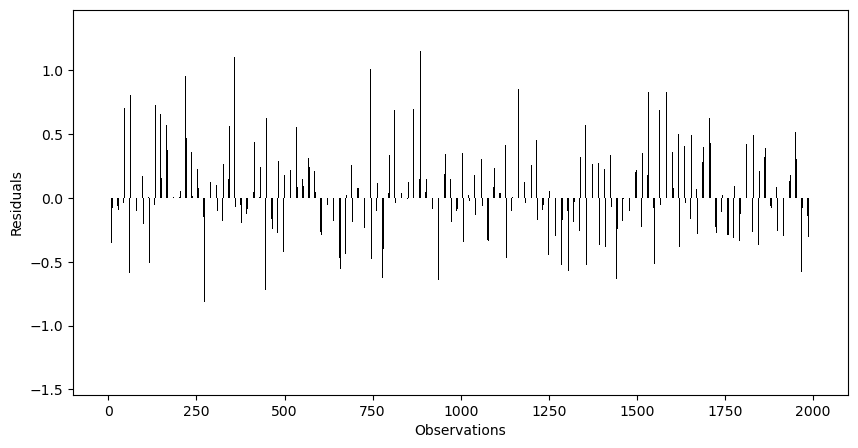

In [34]:
# plot the residuals
# here we can see the regression residuals which are the difference 
# between the predicted outcome values and the observed outcome values
fig = plt.figure(figsize=(10,5))
plt.bar('index', 'error', data=out, color='black', width=0.3)
plt.xlabel("Observations")
plt.ylabel("Residuals")
plt.show()

In [52]:
# using scikit-learn method we can see that our R-squared is much lower than the OLS version
# this is due to the OLS model not having a constant factored in
# https://github.com/scikit-learn/scikit-learn/discussions/21050
modelLR = linear_model.LinearRegression()
modelLR.fit(X_train, y_train)

print ("The intercept is " + str(modelLR.intercept_))
print ("The coefficient is " + str(modelLR.coef_))
print ("The R-squared value is " + str(modelLR.score(X,y)))

The intercept is 1.7896130638841128
The coefficient is [0.99363581]
The R-squared value is 0.40246776372432924


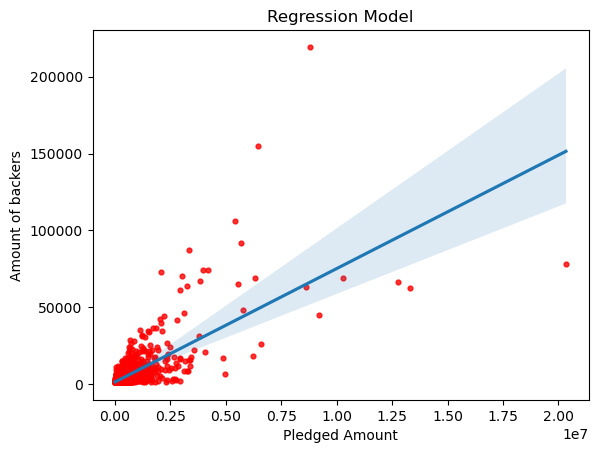

In [36]:
# plotting the regression model
g = sns.regplot(kickstart_data["pledged_amount"], kickstart_data["backers"], fit_reg=True,scatter_kws={'color':'r','s':12});
g.set_title("Regression Model");
g.set_xlabel("Pledged Amount");
g.set_ylabel("Amount of backers");

In [37]:
# doing predictions on scikit model
y_predicts = modelLR.predict(X_test)
skOut = pd.DataFrame({'Predictions':y_pred, 'Actual Values':y_test})
skOut['error'] = skOut['Actual Values']-skOut['Predictions']
skOut.head()

,Predictions,Actual Values,error
2230,4.941054,4.590608,-0.350446
668,5.544578,5.647165,0.102587
3616,4.684746,4.816135,0.131390
2363,4.910656,5.198217,0.287561
142,6.202414,6.454702,0.252288


In [38]:
# removing index with random numbers from scikit model
skOut.reset_index(drop=True, inplace=True)
skOut.reset_index(inplace=True)
skOut.head()

,index,Predictions,Actual Values,error
0,0,4.941054,4.590608,-0.350446
1,1,5.544578,5.647165,0.102587
2,2,4.684746,4.816135,0.131390
3,3,4.910656,5.198217,0.287561
4,4,6.202414,6.454702,0.252288


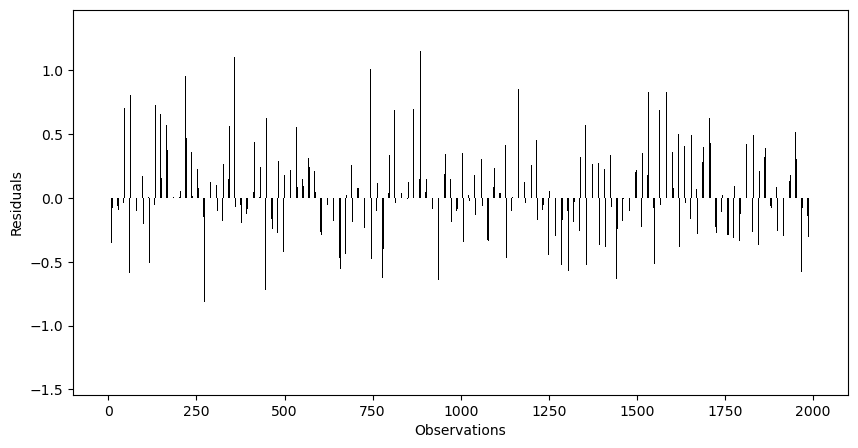

In [39]:
# plot the residuals
# once again here we can see the regression residuals which are the difference 
# between the predicted outcome values and the observed outcome values
# compared to the graph a few cells above we can see more variation in the residuals with this model
fig = plt.figure(figsize=(10,5))
plt.bar('index', 'error', data=skOut, color='black', width=0.3)
plt.xlabel("Observations")
plt.ylabel("Residuals")
plt.show()

In [ ]:
# In conclusion through doing linear regression through scikit and OLS
# OLS determines that the R-squared value is 0.995 however this is without a constant/intercept value taken into consideration
# scikit determines that we have an R-squared value of 0.41 which means that our model only covers 40-41% of variation in the data